<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [55]:
library(datasets)
data <- iris
head(data)

part_data <- data[1:4]

#coding_categ_data <- function(data) {
#  new_data <- transform(data, Species = as.numeric(as.factor(Species)))
#  return(new_data)
#}
#cdata <- coding_categ_data(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [56]:
#install.packages("cluster")
library(cluster)

In [57]:
model_kmeans <- kmeans(part_data, centers = 2, nstart = 1)
print(model_kmeans)

K-means clustering with 2 clusters of sizes 53, 97

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.005660    3.369811     1.560377    0.290566
2     6.301031    2.886598     4.958763    1.695876

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1]  28.55208 123.79588
 (between_SS / total_SS =  77.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


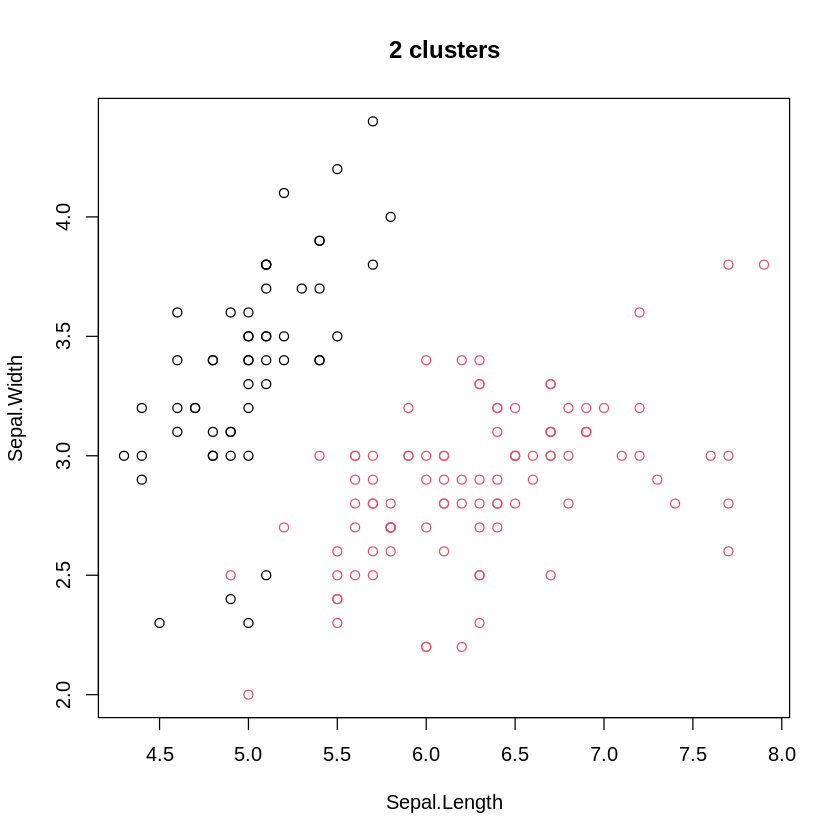

In [58]:
plot(part_data[c("Sepal.Length", "Sepal.Width")], col = model_kmeans$cluster, main = "2 clusters")

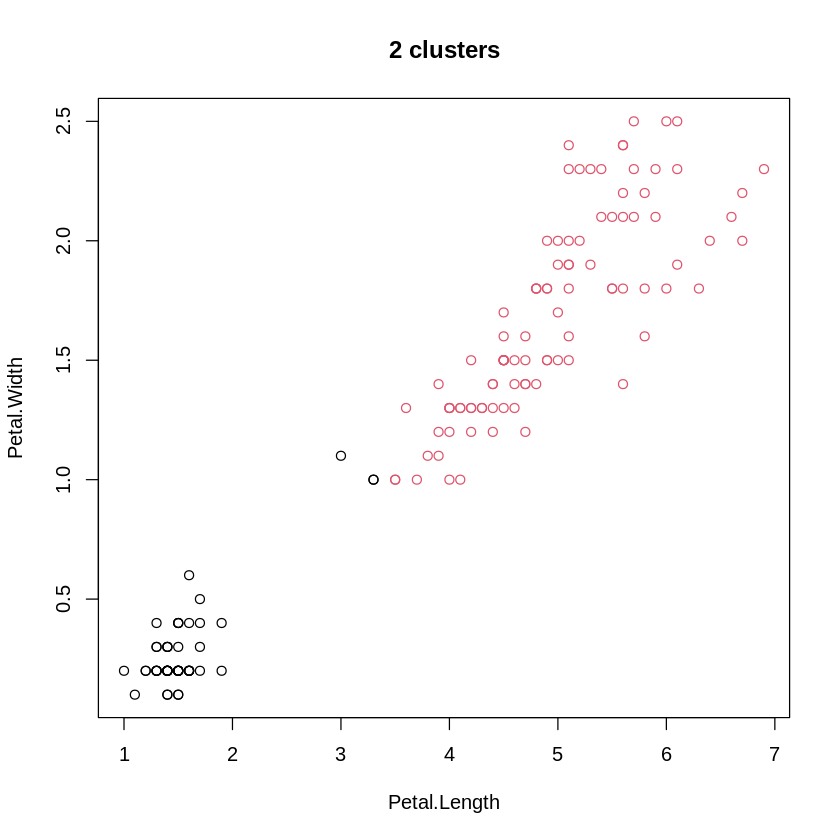

In [59]:
plot(part_data[c("Petal.Length", "Petal.Width")], col = model_kmeans$cluster, main = "2 clusters")

In [61]:
#install.packages("factoextra")
#install.packages("purrr")
library(factoextra)
library(purrr)


Call:
hclust(d = dist_ward, method = "ward.D")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 150 



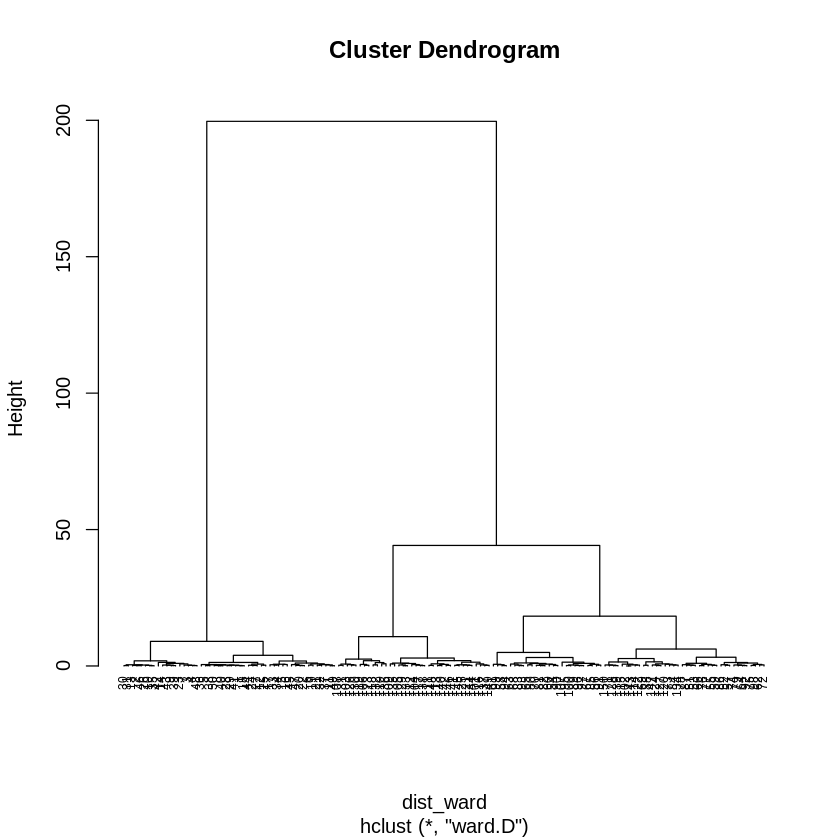

In [60]:
dist_ward <- dist(part_data, method = "euclidean")
model_ward <- hclust(dist_ward, method = "ward.D" )
print(model_ward)
plot(model_ward, cex = 0.6, hang = -1)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2


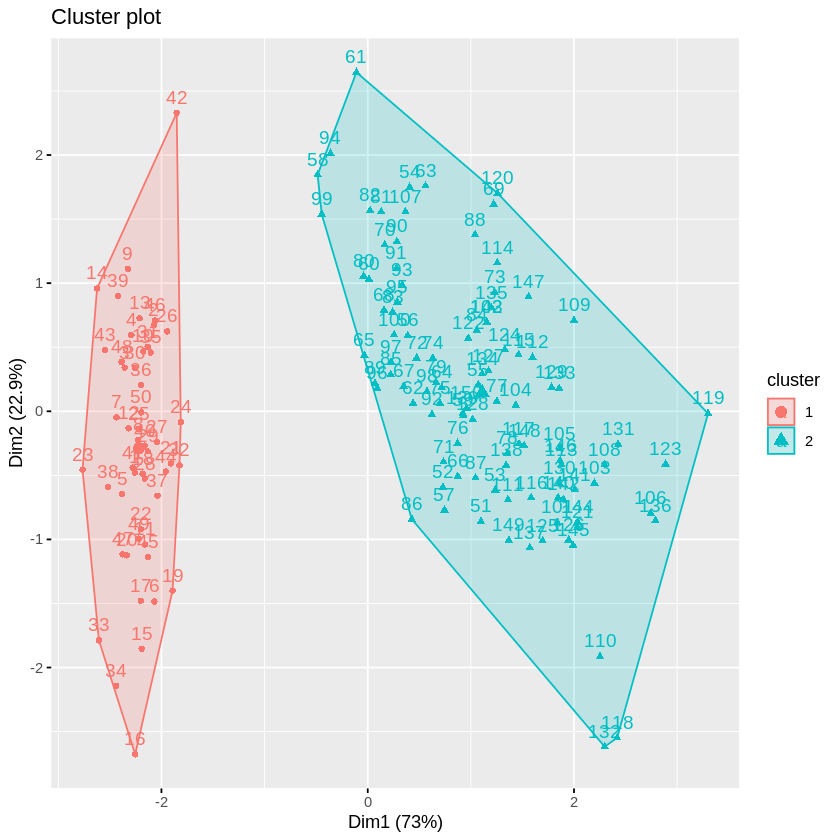

In [51]:
sub_grps <- cutree(model_ward, k = 2)
print(sub_grps)
fviz_cluster(list(data = part_data, cluster = sub_grps))

[1] 0.953798

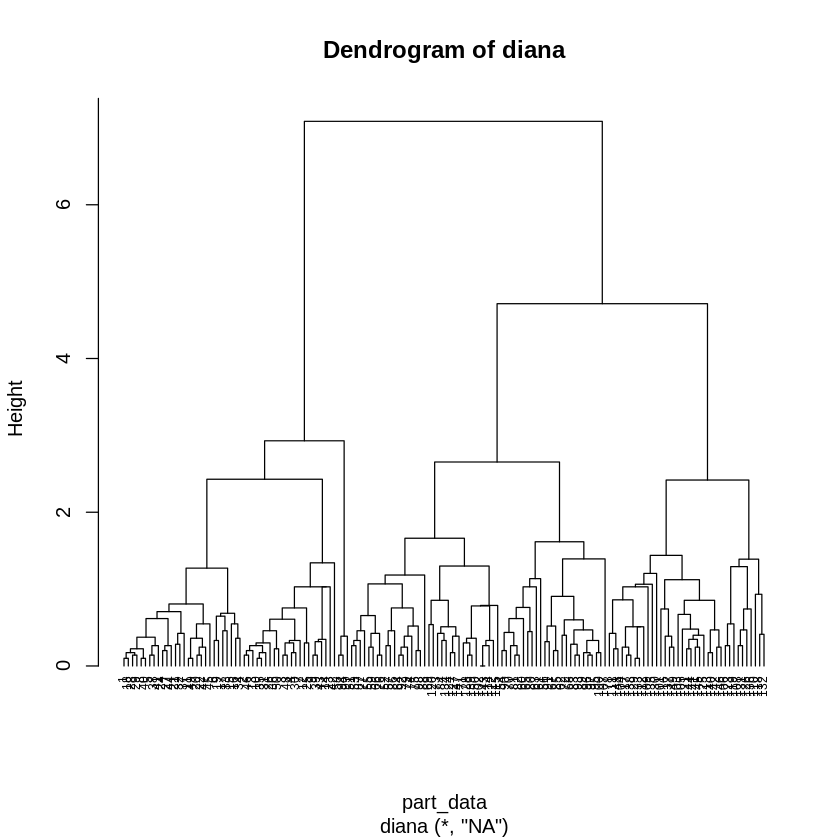

In [50]:
model_diana <- diana(part_data)
model_diana$dc
 
# Plot obtained dendrogram
pltree(model_diana, cex = 0.6, hang = -1,
       main = "Dendrogram of diana")

#2

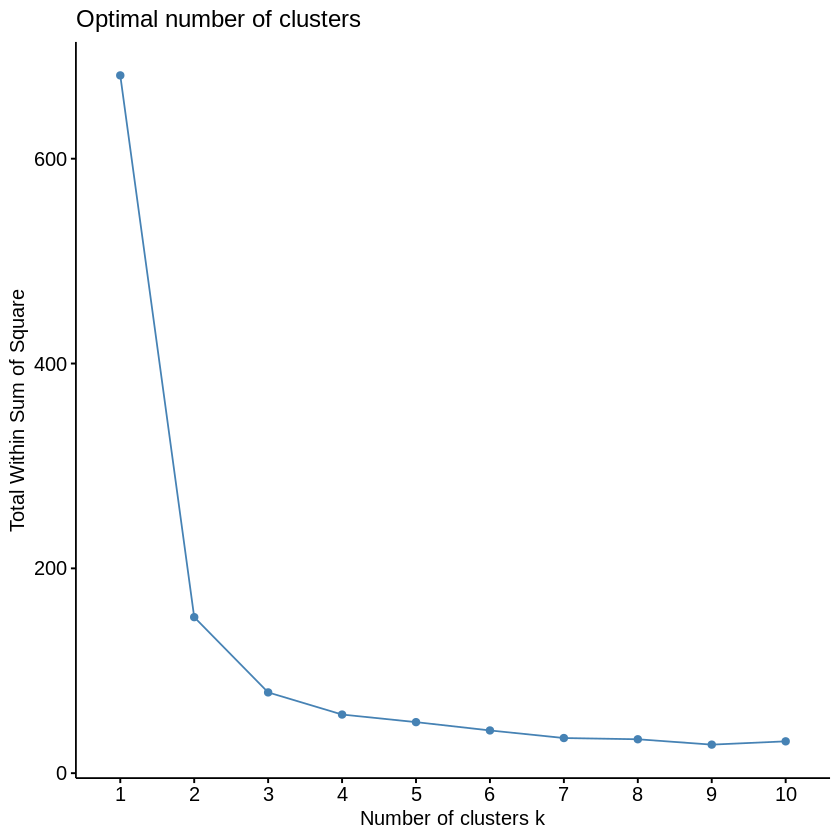

In [52]:
fviz_nbclust(part_data, kmeans, method = "wss")